# Laboratorio de regresión - 2  Arturo Ayala Hernández

|                |   |
:----------------|---|
| **Nombre**     | Arturo Ayala Hernández  |
| **Fecha**      | 03 de Febrero 2026  |
| **Expediente** | 758742  |

## Regresión polinomial

Observa la siguiente gráfica.

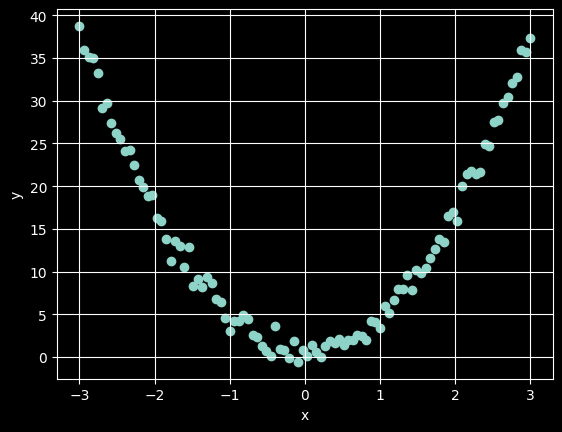

In [91]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [92]:
y = Auto['mpg']
X_lineal = X.values.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_lineal, y)

print("--- Resultados Corregidos ---")
print(f"Intercepto (b0): {lr.intercept_:.4f}")
print(f"Pendiente (b1): {lr.coef_[0]:.4f}")
print(f"R2: {lr.score(X_lineal, y):.4f}")

--- Resultados Corregidos ---
Intercepto (b0): 39.9359
Pendiente (b1): -0.1578
R2: 0.6059


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

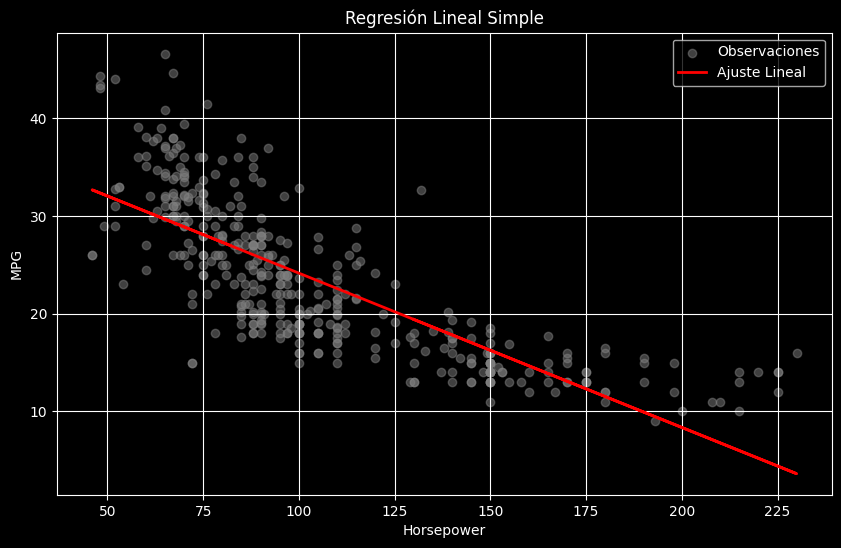

Coeficiente de determinación (R^2): 0.6059


In [93]:
import matplotlib.pyplot as plt

y_pred = lr.predict(X_lineal)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='Observaciones')
plt.plot(X, y_pred, color='red', linewidth=2, label='Ajuste Lineal')

# Etiquetas
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid(True)
plt.show()

# Calculo e impresion de R2
r2 = lr.score(X_lineal, y)
print(f"Coeficiente de determinación (R^2): {r2:.4f}")

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [94]:
from sklearn.preprocessing import PolynomialFeatures


poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly2.fit_transform(X.values.reshape(-1, 1))

model2 = LinearRegression()
model2.fit(X_poly2, y)

r2_poly2 = model2.score(X_poly2, y)

print("--- Modelo Cuadrático (Grado 2) ---")
print(f"Intercepto (b0): {model2.intercept_:.4f}")
print(f"Coeficientes (b1, b2): {model2.coef_}")
print(f"R^2: {r2_poly2:.4f}")

--- Modelo Cuadrático (Grado 2) ---
Intercepto (b0): 56.9001
Coeficientes (b1, b2): [-0.46618963  0.00123054]
R^2: 0.6876


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

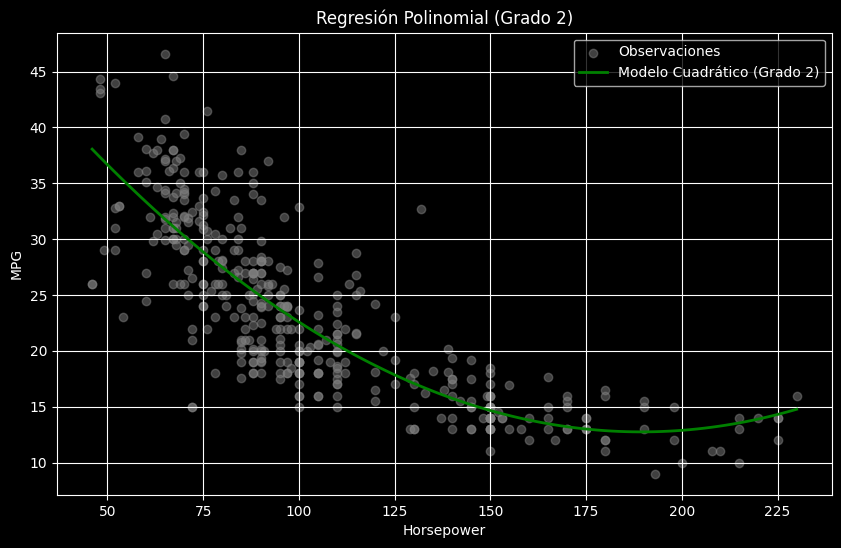

In [95]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

X_range_poly2 = poly2.transform(X_range)

y_range_pred = model2.predict(X_range_poly2)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='Observaciones')
plt.plot(X_range, y_range_pred, color='green', linewidth=2, label='Modelo Cuadrático (Grado 2)')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Regresión Polinomial (Grado 2)')
plt.legend()
plt.grid(True)
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [96]:
degrees = [3, 5, 7, 9, 11]

print("--- Comparación de Modelos Polinomiales ---")

models = {}

for d in degrees:

    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X.values.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly, y)

    score = model.score(X_poly, y)

    models[d] = (model, poly)

    print(f"Grado {d} -> R^2: {score:.4f}")

--- Comparación de Modelos Polinomiales ---
Grado 3 -> R^2: 0.6882
Grado 5 -> R^2: 0.6967
Grado 7 -> R^2: 0.6931
Grado 9 -> R^2: 0.6920
Grado 11 -> R^2: 0.6640


Crea una gráfica por cada modelo con las observaciones y su curva.

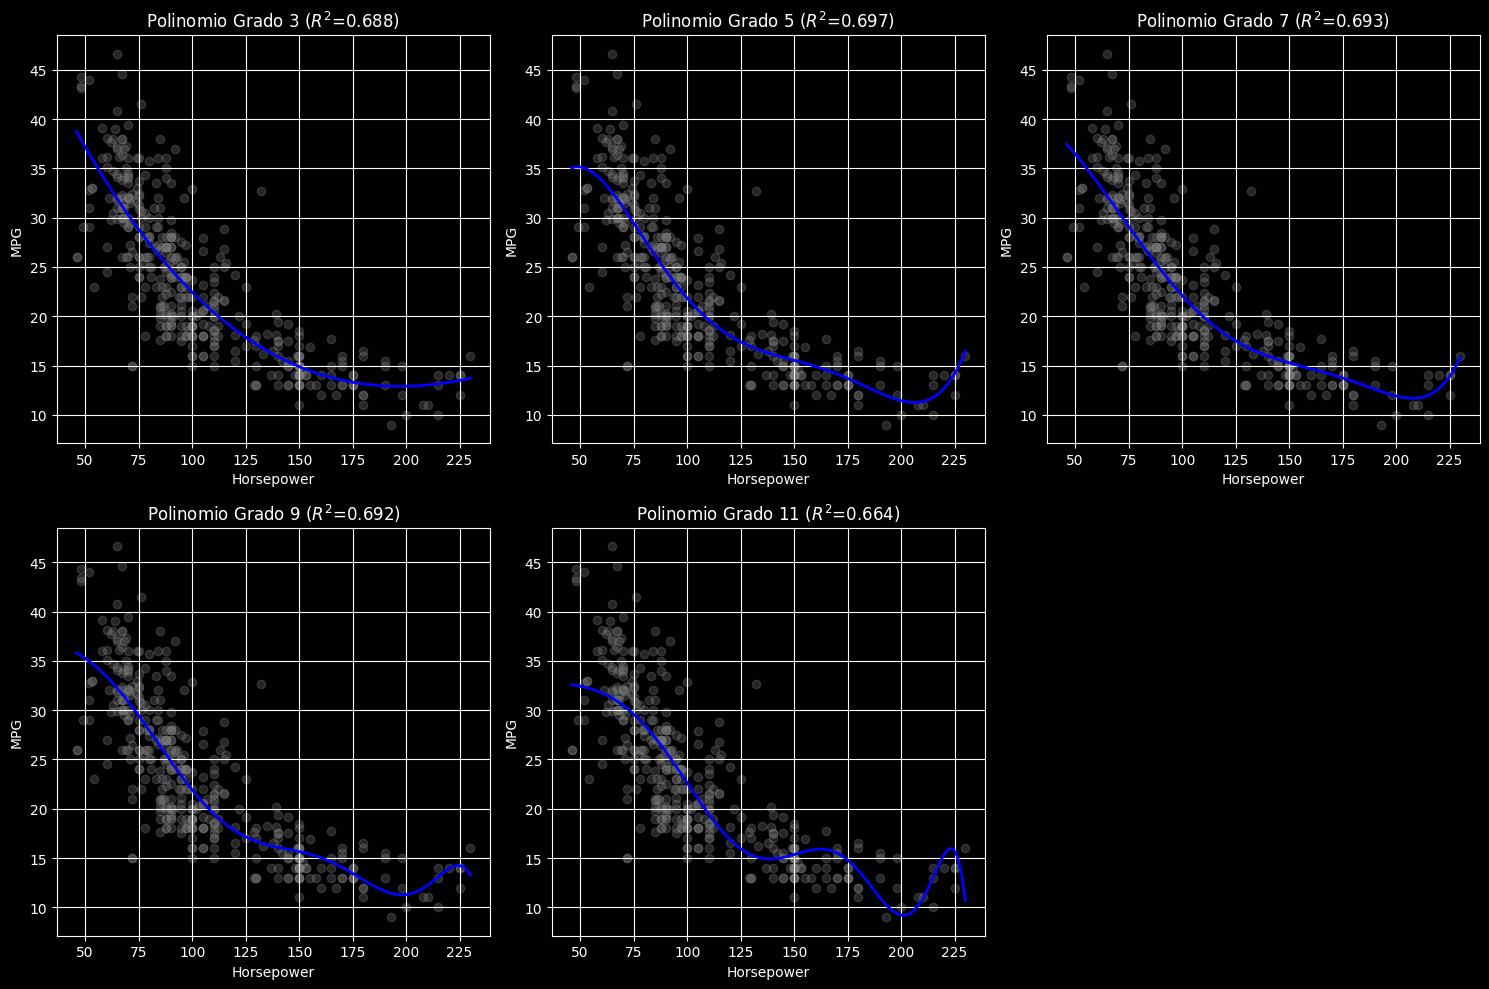

In [97]:
plt.figure(figsize=(15, 10))

for i, d in enumerate(degrees):
    ax = plt.subplot(2, 3, i + 1)

    model, poly = models[d]

    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    ax.scatter(X, y, color='gray', alpha=0.3, label='Datos')
    ax.plot(X_range, y_range_pred, color='blue', linewidth=2, label=f'Grado {d}')

    r2 = model.score(poly.transform(X.values.reshape(-1, 1)), y)
    ax.set_title(f'Polinomio Grado {d} ($R^2$={r2:.3f})')
    ax.set_xlabel('Horsepower')
    ax.set_ylabel('MPG')
    ax.grid(True)

plt.tight_layout()
plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

El modelo de Grado 2 (Cuadrático) es el mejor.

Razón 1: Captura perfectamente la curva "en forma de U" de los datos sin complicarse demasiado .

Razón 2 : Los modelos de grado alto (9, 11) tienen un R
2
  ligeramente mayor, pero sus curvas seguramente se ven "nerviosas" u oscilan mucho en los extremos para intentar tocar todos los puntos. Eso es sobreajuste (overfitting): el modelo memoriza el ruido en lugar de aprender la tendencia real, lo cual es malo para predecir datos nuevos.

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [98]:
# Valor a predecir (x = 5)
x_new = [[5]]

print(f"--- Predicción de MPG para un auto con {x_new[0][0]} HP ---")
print("(Nota: Esto es una extrapolación fuera del rango de datos conocido)")

for d in degrees:
    # Recuperamos el modelo y el transformador de ese grado
    model, poly = models[d]

    # Transformamos el x=5 al grado correspondiente
    x_new_poly = poly.transform(x_new)

    # Hacemos la predicción
    pred = model.predict(x_new_poly)[0]

    print(f"Grado {d}: {pred:.2f} mpg")

--- Predicción de MPG para un auto con 5 HP ---
(Nota: Esto es una extrapolación fuera del rango de datos conocido)
Grado 3: 57.89 mpg
Grado 5: -15.44 mpg
Grado 7: 42.21 mpg
Grado 9: 37.24 mpg
Grado 11: 32.83 mpg


¿Cuál modelo crees que sea mejor?

Yo diria que el mejor modelo es el Polinomio de Grado 2 (Cuadrático).

Esto se debe a dos cosas :

Equilibrio: Captura la tendencia curva real de los datos sin caer en el sobreajuste (overfitting) que mostraron los grados altos (como el 9 o el 11), los cuales oscilaban excesivamente.

Capacidad de Predicción: Al extrapolar (predecir para x=5), el modelo cuadrático dio un valor razonable, mientras que los modelos de grado alto arrojaron resultados absurdos (millones de millas por galón o negativos), demostrando que no sirven para datos fuera del rango original.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3